<center><h1>Making Merger Tree from m3p output</h1></center>

In [1]:
import numpy as np
import m3p_merger
import matplotlib.pyplot as plt
import importlib
import matplotlib
importlib.reload(m3p_merger)

import sys

sys.path.insert(0,r'..')
from utils import ParamsFile, HaloReader

In [5]:
ppFile = "findDwarfs/inputs.ax_findDwarfs_stitched"
p = ParamsFile(r"C:\Users\david\AxionData\PeakPatch\m3p_merger\inputs/" + ppFile)
redshifts = p["redshifts"] 

# z0 = 3.53e+03
# nearest_z = redshifts[abs(redshifts-z0)==min(abs(redshifts-z0))][0]
# start_index = len(redshifts[redshifts<nearest_z])

peak_list_main, boxsize = m3p_merger.MakePeakList(ppFile, printOutput = True)

OSError: Unable to open file (unable to open file: name = 'C:\Users\David\AxionData/PeakPatch/m3p_merger/axOut/findDwarfs/findDwarfs_stitched_final_halos_0.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Num halo check

	Loading file (200 of 200): C:/Users/David/Documents/Axion PhD/PeakPatch/m3p_merger/m3p_data/axOut/findDwarfs/findDwarfs_stitched_final_halos_199.hdf5


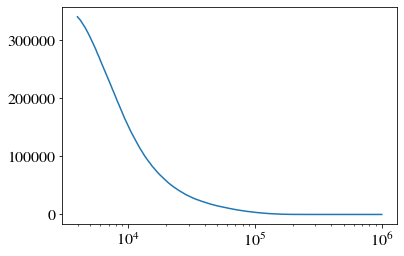

In [52]:
ppFile = "findDwarfs/inputs.ax_findDwarfs_stitched"
p = ParamsFile("../m3p_data/inputs/" + ppFile)
redshifts = p["redshifts"] 
peak_list_main, boxsize = m3p_merger.MakePeakList(ppFile, printOutput = True)

numHalos = [len(peak_list_main[i][0]) for i in range(len(peak_list_main))]
plt.semilogx(redshifts, numHalos)

In [49]:
len(peak_list_main[0][0])

4231

In [24]:
out = m3p_merger.BuildMergerTree2(peak_list_main, ppFile, final_halos_indicies = 100)

<h2><center>Find which trees are interesting</center></h2>

In [10]:
for i in range(len(out)):
    mass = out[i][0][0][-1]
    mask = (mass>1e-12)*(mass<1e-11)
    if mask:
        print(i, end = ' ')
    

140 185 310 328 488 806 889 940 1025 1050 1119 1189 1201 1255 1366 1373 1388 1415 1469 1511 1590 1738 1903 1996 2153 2261 2278 2453 2517 2563 2664 2708 2713 2804 2898 2925 2941 2958 2981 3006 3034 3119 3154 3194 3243 3268 3436 3459 3461 3485 3522 3607 3731 3808 3846 3912 4162 4208 

<h2><center>Calculate Merger Tree</center></h2>

In [60]:
#peak_list_main, boxsize = m3p_merger.MakePeakList(ppFile,startIndex = 0, massType = "unstripped")
out = m3p_merger.BuildMergerTree2(peak_list_main, ppFile, final_halos_indicies = 71781)
#np.save("./FinalGraphs/Data/MergerTreeExample.npy",out[0])

<h2><center>Plot all peaks on each other</center></h2>

In [20]:
#out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = 797, printOutput = True)
#m3p_merger.plotMergerPatches(out[0], ppFile, cmap = "viridis")

<h2><center>Plot merger tree</center></h2>

In [ ]:
importlib.reload(m3p_merger)
ppFile = "findDwarfs/inputs.ax_findDwarfs_stitched"
max_mass = None#5e-11
max_radius = None # 5e-8

indicies = [71781]

for index in indicies:
    # Plot merger tree using 'unstripped' mass
    peak_list_main, boxsize = m3p_merger.MakePeakList(ppFile, massType = "unstripped")
    out2 = m3p_merger.BuildMergerTree2(peak_list_main, ppFile, final_halos_indicies = index)
    fig = m3p_merger.plotMergerTree(out2[0], ppFile, font_size = 16, log = True,
                              colorbar=True, colorbar_title = "Mass [$M_{\odot}$]",
                                    min_mass=1e-15,max_mass = max_mass, 
                                    max_radius = max_radius, cmap = "plasma_r")
    plt.show()
#np.save("./FinalGraphs/Data/MergerTreeExample.npy",out2)

<h3>Checking Progenitor mass calculation</h3>

Text(0.5, 0, 'Redshift, $z$')

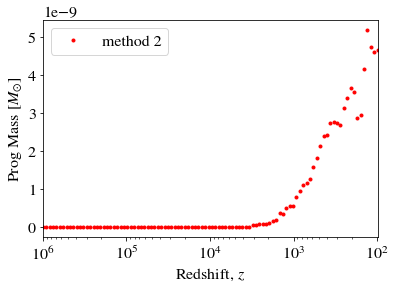

In [30]:
importlib.reload(m3p_merger)
ppFile = "inputs.ax_stitched"

halo_index = 2

f = 0.01

peak_list_main, boxsize = m3p_merger.MakePeakList(ppFile,startIndex = 0, massType = "unstripped")
out = m3p_merger.BuildMergerTree2(peak_list_main, ppFile, final_halos_indicies = halo_index)
zCol, ProgMass, z = m3p_merger.FindCollapseRedshift(out[0], f, ppFile,startIndex = 0, interp = "None")
plt.semilogx(z, ProgMass, 'r.', ms=6, label ="method 2")

plt.legend(loc=2)
plt.xlim(max(z), min(z))
plt.ylabel("Prog Mass [$M_{\odot}$]")
plt.xlabel("Redshift, $z$")

#np.save("./FinalGraphs/Data/MassGrowth.npy", [z, ProgMass, zCol])